# Minor Project - Credit Card Clustering using PCA and K-Means

### Problem Statement
Create a clustering model to credit card categorize the dataset
into appropriate cluster. Context: This case requires to develop a customer
segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card
holders during the last 6 months. The file is at a customer level with 18 behavioral
variables.

### Importing the Dataset

In [1]:
import numpy as np
import pandas as pd

credit = pd.read_csv('credit_card.csv')
credit

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
credit.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Feature Engineering

In [3]:
credit.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
credit = credit.drop(['CUST_ID'], axis=1)


In [5]:
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Removing Outliers
Outliers in the dataset were removed and replaced with NaN values.

In [6]:
for c in credit.columns:
    data = credit[c]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    max_val = q3 + 1.5*iqr
    min_val = q1 - 1.5*iqr
    
    outliers = ((data<min_val) | (data>max_val))
    credit[c].loc[outliers] = np.nan

credit.isnull().sum()


   

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         249
PAYMENTS                             808
MINIMUM_PAYMENTS                    1154
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

### Using KNNImputer to impute NaN values with mean values

In [7]:
from sklearn.impute import KNNImputer
imp = KNNImputer()
credit = pd.DataFrame(imp.fit_transform(credit), columns=credit.columns)
credit

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.000,0.00,1068.127248,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.170,0.00,0.000000,1.000000,0.650000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,1666.670542,0.981818,1499.00,309.918,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,1112.028902,0.000000,12.0
4,817.714335,1.000000,16.00,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.000,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.016667,12.0
8946,19.183215,1.000000,300.00,0.000,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,705.446747,0.000000,12.0
8947,23.398673,0.833333,144.40,0.000,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,12.0
8948,13.457564,0.833333,0.00,0.000,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2.0,0.0,500.0,52.549959,55.755628,0.250000,12.0


In [8]:
credit.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Scaling the Dataset using Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
credit_df = pd.DataFrame(scaler.fit_transform(credit))
credit_df.columns = credit.columns
credit_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.938415,-2.648163,-0.769054,-0.668008,-0.453071,-0.648957,-0.806490,-0.744535,-0.707313,-0.747150,-0.681634,-0.780853,-1.058772,-0.990200,-0.849651,-0.449541,0.0
1,1.544889,-1.140713,-0.910890,-0.668008,-0.787709,0.880535,-1.221758,-0.744535,-0.916995,1.029213,0.865275,-0.966433,0.877124,2.904565,1.216882,2.720181,0.0
2,0.989314,0.366737,0.238620,1.571492,-0.787709,-0.648957,1.269843,2.115073,-0.916995,-0.747150,-0.681634,0.147050,1.038449,-0.570632,0.230934,-0.449541,0.0
3,0.338573,0.065247,1.317747,0.229675,-0.787709,-0.354281,-1.014125,-0.377920,-0.916995,-0.155031,-0.294907,-0.873643,1.038449,-1.191668,1.304805,-0.449541,0.0
4,-0.328254,0.366737,-0.887102,-0.621664,-0.787709,-0.648957,-1.014125,-0.377920,-0.916995,-0.747150,-0.681634,-0.873643,-0.994242,-0.514457,-0.616417,-0.449541,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.948160,0.366737,-0.478068,-0.668008,0.233462,-0.648957,1.269843,-0.744535,1.179833,-0.747150,-0.681634,-0.409691,-1.058772,-0.866613,-1.050412,-0.211812,0.0
8946,-0.955473,0.366737,-0.464865,-0.668008,0.264611,-0.648957,1.269843,-0.744535,1.179833,-0.747150,-0.681634,-0.409691,-1.058772,-0.916264,0.404089,-0.449541,0.0
8947,-0.952162,-2.396930,-0.696204,-0.668008,-0.281192,-0.648957,0.854576,-0.744535,0.760469,-0.747150,-0.681634,-0.502482,-1.058772,-1.110532,-0.976128,3.116400,0.0
8948,-0.959970,-2.396930,-0.910890,-0.668008,-0.787709,-0.596607,-1.221758,-0.744535,-0.916995,0.437094,0.091821,-0.966433,-1.220097,-1.139205,-1.035195,3.116400,0.0


In [11]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.0
mean,1.007140e-16,3.659946e-15,-2.328256e-15,6.933002e-15,6.562348e-16,8.309058e-16,-3.716084e-16,-6.162668e-17,2.353921e-16,7.161001e-16,-3.218468e-16,-3.808350e-15,3.697204e-15,-8.373687e-16,1.329911e-16,-2.147854e-15,0.0
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,0.0
min,-9.705408e-01,-4.155613e+00,-9.108903e-01,-6.680081e-01,-7.877087e-01,-6.489569e-01,-1.221758e+00,-7.445352e-01,-9.169952e-01,-7.471495e-01,-6.816338e-01,-9.664333e-01,-1.365289e+00,-1.191668e+00,-1.158670e+00,-4.495406e-01,0.0
25%,-8.698480e-01,3.667368e-01,-8.520893e-01,-6.680081e-01,-7.877087e-01,-6.489569e-01,-1.014125e+00,-7.445352e-01,-9.169952e-01,-7.471495e-01,-6.816338e-01,-8.736430e-01,-8.651825e-01,-8.090269e-01,-7.803818e-01,-4.495406e-01,0.0
50%,-2.885421e-01,3.667368e-01,-3.756604e-01,-5.869491e-01,-4.755205e-01,-6.489569e-01,2.404259e-02,-3.779201e-01,-4.976286e-01,-7.471495e-01,-6.816338e-01,-3.169012e-01,-4.134734e-01,-3.372865e-01,-4.243503e-01,-4.495406e-01,0.0
75%,5.627106e-01,3.667368e-01,6.123033e-01,3.670389e-01,5.317248e-01,5.417945e-01,1.062211e+00,4.286381e-01,9.701506e-01,4.370943e-01,4.785480e-01,6.110018e-01,6.496561e-01,6.767671e-01,6.364580e-01,-2.118122e-01,0.0
max,2.909752e+00,3.667368e-01,3.121026e+00,3.512621e+00,3.318057e+00,3.337981e+00,1.269843e+00,2.555014e+00,1.599199e+00,3.128553e+00,3.185639e+00,2.837969e+00,3.006609e+00,2.978734e+00,2.850989e+00,4.305042e+00,0.0


### Applying PCA to reduce dimensions
Here n_components has been set to 0.9, which means that the model will automatically produce components that will preserve 90% of variance in the dataset.

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=0.9)
pca.fit(credit_df)
pca_df = pd.DataFrame(pca.transform(credit_df))
pca_df

,0,1,2,3,4,5,6,7,8
0,-1.215016,-2.827960,-0.370066,0.607816,0.497471,2.342552,0.167584,-0.322141,-0.008036
1,-2.477185,2.286722,0.014155,2.049750,3.362942,-0.806418,1.085446,-0.978216,-0.166834
2,1.373260,0.766590,-2.600888,-1.143651,-0.337880,0.079396,0.419479,1.150778,-0.840819
3,-0.934117,0.303190,-1.320622,-1.377772,0.437750,0.388142,0.386068,0.772357,1.131153
4,-1.449395,-2.050479,-0.718962,-0.719717,-0.123729,-0.285327,-0.037800,-0.623234,-0.169474
...,...,...,...,...,...,...,...,...,...
8945,0.788039,-2.386926,1.371552,-0.392966,-0.610733,-0.183785,-0.186647,0.068435,-0.273105
8946,0.646139,-1.852996,1.484141,-1.108471,-0.486859,0.065117,0.467924,-0.087773,-0.261889
8947,0.343636,-2.992988,0.992261,2.433362,1.440004,0.600270,2.009501,1.047617,-0.323927
8948,-1.980695,-2.642891,-0.118814,3.018381,1.122634,0.467302,1.857277,0.762124,0.159062


## Clustering using K-Means

### Using Elbow Method to figure out number of clusters

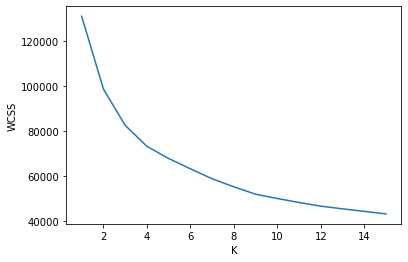

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

krange = range(1,16)
wcss = []

for k in krange:
    km = KMeans(n_clusters=k)
    km.fit(pca_df)
    wcss.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(krange,wcss)



Here, it can be interpreted that the graph shows an elbow pattern at clusters=4.

In [15]:
kmeans = KMeans(n_clusters=4)
pred = kmeans.fit_predict(pca_df)
pca_df['Clusters'] = pred
pca_df

,0,1,2,3,4,5,6,7,8,Clusters
0,-1.215016,-2.827960,-0.370066,0.607816,0.497471,2.342552,0.167584,-0.322141,-0.008036,2
1,-2.477185,2.286722,0.014155,2.049750,3.362942,-0.806418,1.085446,-0.978216,-0.166834,1
2,1.373260,0.766590,-2.600888,-1.143651,-0.337880,0.079396,0.419479,1.150778,-0.840819,0
3,-0.934117,0.303190,-1.320622,-1.377772,0.437750,0.388142,0.386068,0.772357,1.131153,2
4,-1.449395,-2.050479,-0.718962,-0.719717,-0.123729,-0.285327,-0.037800,-0.623234,-0.169474,2
...,...,...,...,...,...,...,...,...,...,...
8945,0.788039,-2.386926,1.371552,-0.392966,-0.610733,-0.183785,-0.186647,0.068435,-0.273105,3
8946,0.646139,-1.852996,1.484141,-1.108471,-0.486859,0.065117,0.467924,-0.087773,-0.261889,3
8947,0.343636,-2.992988,0.992261,2.433362,1.440004,0.600270,2.009501,1.047617,-0.323927,3
8948,-1.980695,-2.642891,-0.118814,3.018381,1.122634,0.467302,1.857277,0.762124,0.159062,2


In [16]:
pca_df.describe()

,0,1,2,3,4,5,6,7,8,Clusters
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8950.000000
mean,-2.168346e-17,2.157678e-16,-6.897028e-18,1.519703e-16,7.839787e-17,4.598897e-17,1.516416e-16,6.091961e-17,-1.352115e-17,1.519888
std,2.227315e+00,1.782316e+00,1.240880e+00,1.174038e+00,1.012037e+00,9.524618e-01,8.209463e-01,7.495410e-01,6.449795e-01,1.077817
min,-4.469387e+00,-3.127591e+00,-3.673909e+00,-3.074919e+00,-3.775596e+00,-3.009910e+00,-3.083153e+00,-3.145060e+00,-2.800123e+00,0.000000
25%,-2.002843e+00,-1.455263e+00,-7.449871e-01,-7.370884e-01,-6.351742e-01,-3.206502e-01,-5.194263e-01,-3.958235e-01,-2.847071e-01,1.000000
50%,-8.276652e-03,-2.437207e-01,1.900863e-02,-2.202267e-01,-9.897179e-02,-1.029273e-01,-5.656444e-02,3.622309e-03,1.183806e-02,2.000000
75%,1.650215e+00,1.109496e+00,7.844206e-01,6.323906e-01,6.145798e-01,1.361955e-01,5.075407e-01,4.420318e-01,2.141251e-01,2.000000
max,6.172052e+00,7.065046e+00,4.015364e+00,5.968717e+00,4.317087e+00,4.330741e+00,3.663684e+00,3.174221e+00,3.171007e+00,3.000000


### Viusalise the number of customers in each cluster.

<AxesSubplot:ylabel='Clusters'>

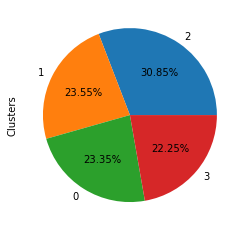

In [17]:
pca_df.Clusters.value_counts().plot.pie(autopct='%.2f%%' )

#### Made By-
Full Name - Vinay Surpur <br>
Email ID - surpurvinay@gmail.com<br>
Mobile no. - 8600062554<br>
Course - Business Analytics<br>